# Acquire and Prepare - Wrangle

What is it?
- this is the step where we acquire and prepare our data in the data science pipeline
- combining these two steps together are oftening referred to as wrangling

Why do we care?
- this sets us for success in exploration and modeling! 

How is regression wrangle different than classification wrangle?
- Its not differenct! Its the same!


# This Example Pipeline Scenario

Scenario: I'm a university teacher, and I want to know when to worry about a student's progress. I want to be able to work with any students who are at high risk of failing the class, so that I can try to prevent that from happening. I have the grades of the three exams and the final grade from last semester's class. I'm hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

Goal: we are trying to predict a students final grade based on previous exam scores

In [2]:
# Data models
import pandas as pd
import numpy as np

# Visualization model
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

Goals:
- Get data 
- Cache a local copy
- Verify it all came in 
- Look at it
- Understand my data
    - Want to know what which ro representations 
    - Understatnd what each column means

In [3]:
# Read csv file into pandas DataFrame.
file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"

In [4]:
df = pd.read_csv(file)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [6]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [7]:
df.shape

(104, 5)

In [9]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [10]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Takeaways:
- All my exam scores have diffeerent datatypes
- My target vareable is final grade
- each row is one student and their respective exam grades, as well as their final score

## Prepare

Goals: 
- Verify/correct datatypes
- Handle your nulls
- Encode your strings values
- Visualize our univariate variables
- End with my train/validate/test split

## Datatypes

In [11]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [12]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [14]:
df.exam3.value_counts()

96    16
78    16
75    15
95     8
87     8
86     8
85     8
94     8
79     8
70     8
       1
Name: exam3, dtype: int64

In [15]:
df [df.exam3 == ' ']

,student_id,exam1,exam2,exam3,final_grade
11,12,57.0,65,,65


Options:
- Removing it completely
- Replacing it with zero'
- Replacing it with an average value of exma3 scores

Decided:
- Will drop this reow since its is only one and its the quckest method

In [19]:
# This was just an example (looking for an average)
df [df.exam3 != ' '].exam3.astype(int).mean()

ValueError: cannot convert float NaN to integer

In [17]:
df.exam3 = df.exam3.replace(' ', np.nan)

In [18]:
df.exam3.value_counts(dropna=False)

96     16
78     16
75     15
95      8
87      8
86      8
85      8
94      8
79      8
70      8
NaN     1
Name: exam3, dtype: int64

## Handle nulls

In [20]:
# Looking for nulls 
# found two nulls
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [25]:
# Found a null in exam 1
# This row will be ideal to be dropped as it's easy
df [df.exam1.isnull()]

,student_id,exam1,exam2,exam3,final_grade
9,10,NaN,70,79,70


In [23]:
df.shape

(104, 5)

In [33]:
# This will drop all nulls from the whole database
# will default to dropping any row with a null in it
# make sure you save it back to the DF
df = df.dropna()

In [34]:
# Check once again at your dataframe to ensure the nulls were dropped. 
df.shape

(102, 5)

In [36]:
df.exam1 = df.exam1.astype(int)

In [41]:
# This will convert exam 3 to an int previously was an object.
# AGAIN SAVE YOUR CODE TO THE DATAFRAME
df.exam3 = df.exam3.astype(int)
df.exam3

0      95
1      96
2      87
3      86
4      96
       ..
99     78
100    79
101    70
102    75
103    78
Name: exam3, Length: 102, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [42]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


## Visualize

In [44]:
df.student_id.nunique()

102

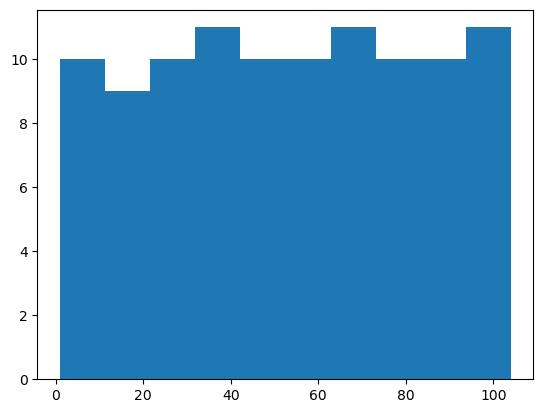

In [45]:
plt.hist(df.student_id)
plt.show()

In [47]:
# enumerate gives us the indes of what we are iterating over
# as well as the itreation fo the df.columns
for col in enumerate(df.columns):
    print(col)
    # plt.subplot(1,5,
    # sns.histplot(df[col])
    # plt.show()

(0, 'student_id')
(1, 'exam1')
(2, 'exam2')
(3, 'exam3')
(4, 'final_grade')


Text(0.5, 0.98, 'Distribution of all my variables')

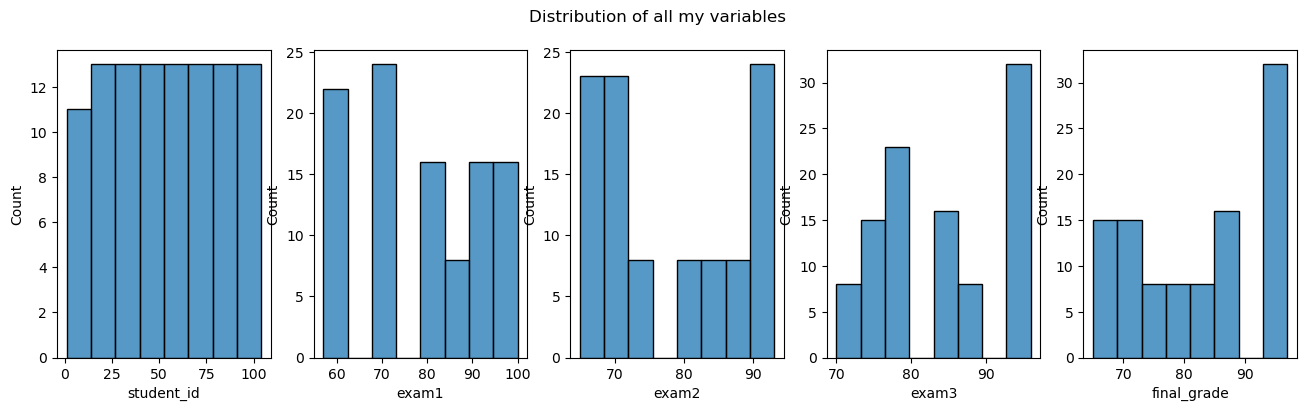

In [53]:
plt.figure(figsize=(16,4))

for i, col in enumerate(df.columns):
    # print(col)
    plt.subplot(1,5,i+1)
    sns.histplot(df[col])
    # plt.show()
    
plt.suptitle('Distribution of all my variables')


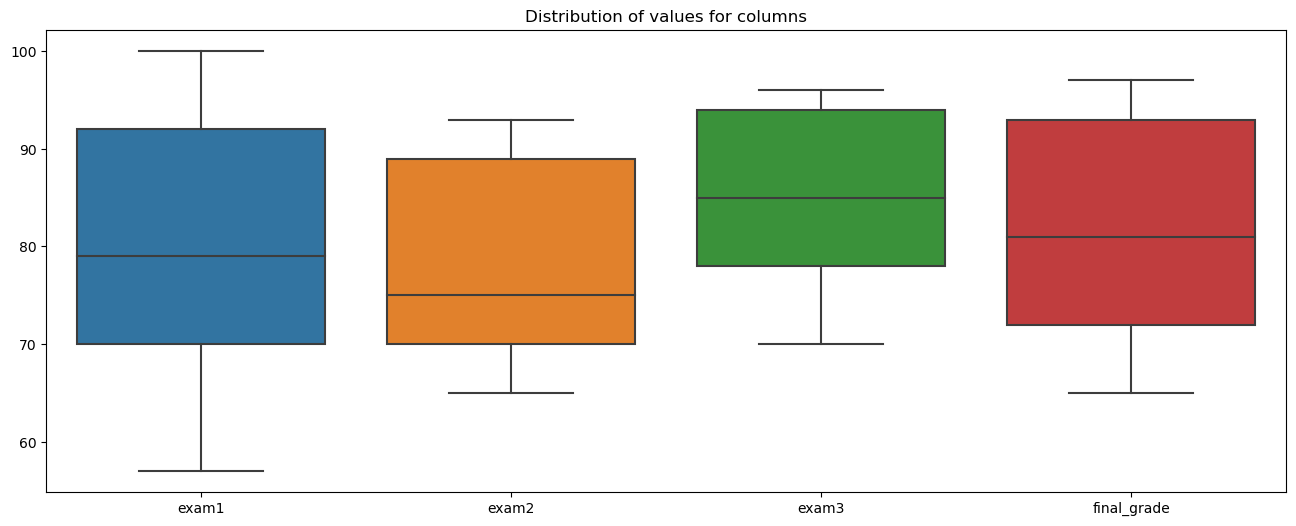

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df.drop(columns='student_id'))
plt.title('Distribution of values for columns')
plt.show()

Takeaways: 

- dropped two rows because of null values
- changing all datatypes to integers
- none of my columns

## Finish wrangle by making a function! 

In [58]:
def wrangle_exams():
    '''
    read csv from url into df, clean df, and return the prepared df
    '''
    # Read csv file into pandas DataFrame.
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    df = pd.read_csv(file)

    #replace blank space with null value
    df.exam3 = df.exam3.replace(' ', np.nan)
    
    #drop all nulls
    df = df.dropna()
    
    #change datatype to exam1 and exam3 to integers
    df.exam1 = df.exam1.astype(int)    
    df.exam3 = df.exam3.astype(int)

    return df

In [59]:
#test it works
wrangle_exams()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97
...,...,...,...,...,...
99,100,70,65,78,77
100,101,62,70,79,70
101,102,58,65,70,68
102,103,57,65,75,65


In [63]:
fresh_df = wrangle_exams()

In [64]:
fresh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [65]:
fresh_df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


## We train/validate/test split BEFORE explore